In [1]:
import os

In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od
od.download('https://www.kaggle.com/competitions/e-artifact')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sahityapalacharla
Your Kaggle Key: ··········


100%|██████████| 71.1k/71.1k [00:00<00:00, 28.5MB/s]


Extracting archive ./e-artifact/e-artifact.zip to ./e-artifact


In [4]:
os.listdir('e-artifact')

['test.csv', 'train.csv', 'submission.csv']

In [5]:
import pandas as pd
import numpy as np

In [6]:
data=pd.read_csv('/content/e-artifact/train.csv')
data.head(5)

,id,N,P,K,temperature,humidity,ph,rainfall,label
0,1,17,16,14,16.396243,92.181519,6.625539,102.944161,orange
1,2,37,79,19,27.543848,69.347863,7.143943,69.408782,blackgram
2,3,7,73,25,27.521856,63.132153,7.288057,45.208411,lentil
3,4,101,70,48,25.360592,75.031933,6.012697,116.553145,banana
4,5,0,17,30,35.474783,47.972305,6.279134,97.790725,mango


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1760 entries, 0 to 1759
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1760 non-null   int64  
 1   N            1760 non-null   int64  
 2   P            1760 non-null   int64  
 3   K            1760 non-null   int64  
 4   temperature  1760 non-null   float64
 5   humidity     1760 non-null   float64
 6   ph           1760 non-null   float64
 7   rainfall     1760 non-null   float64
 8   label        1760 non-null   object 
dtypes: float64(4), int64(4), object(1)
memory usage: 123.9+ KB


In [8]:
data.isnull().sum()

,0
id,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [9]:
data.drop(['id'],axis=1,inplace=True)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

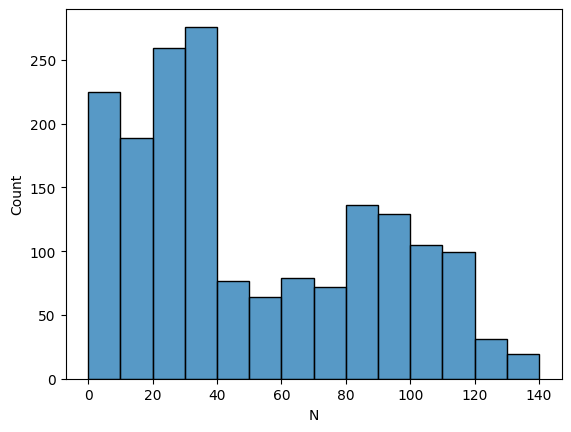

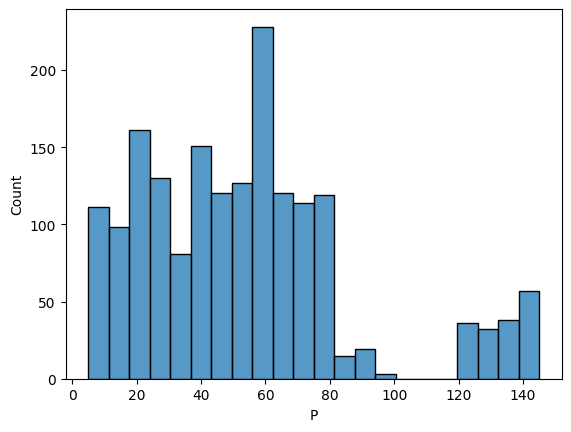

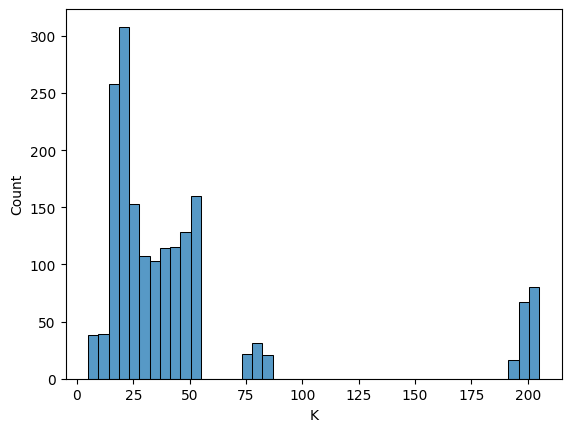

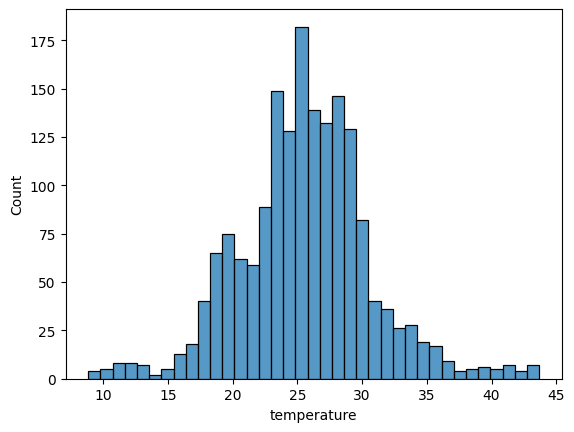

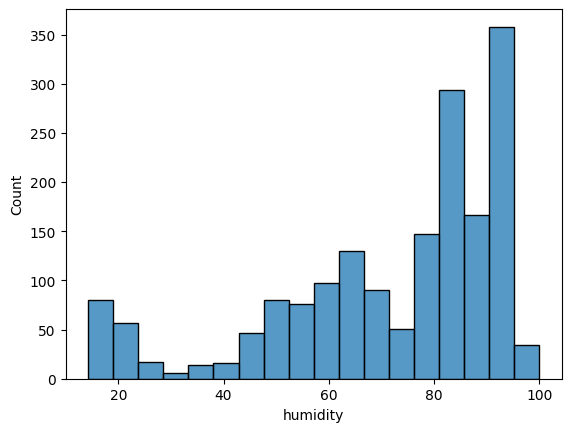

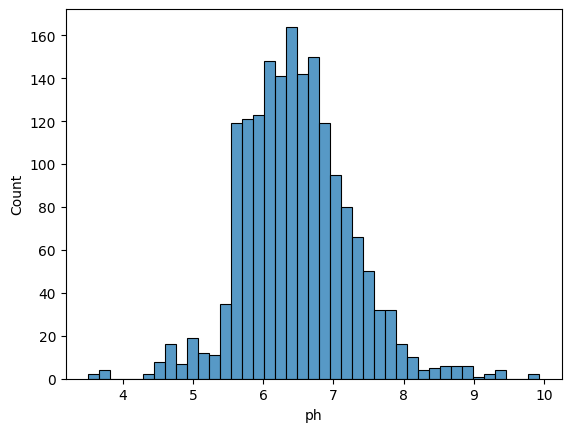

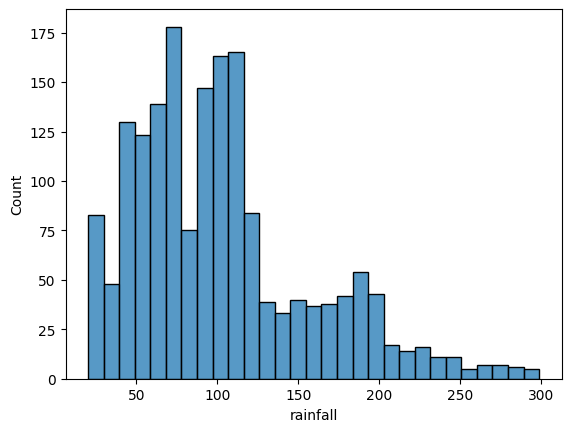

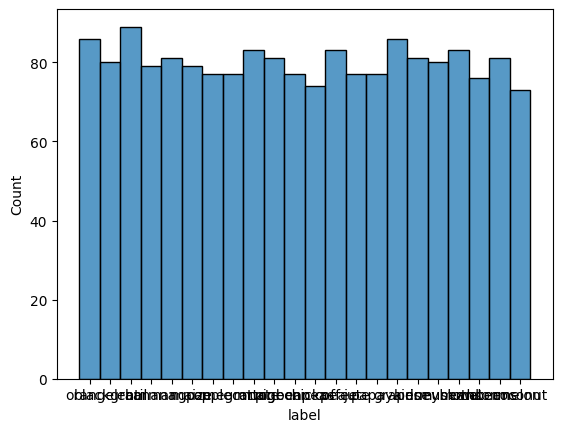

In [11]:
for i in data.columns:
  sns.histplot(data,x=i)
  plt.show()

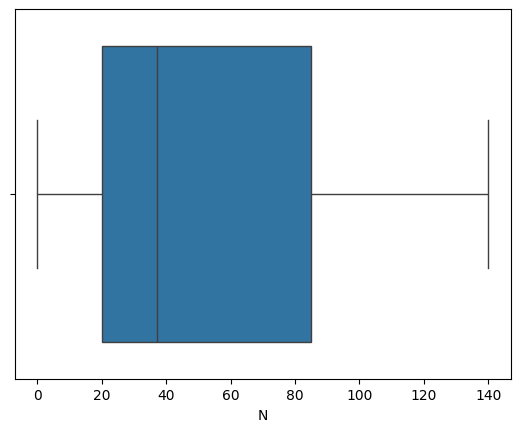

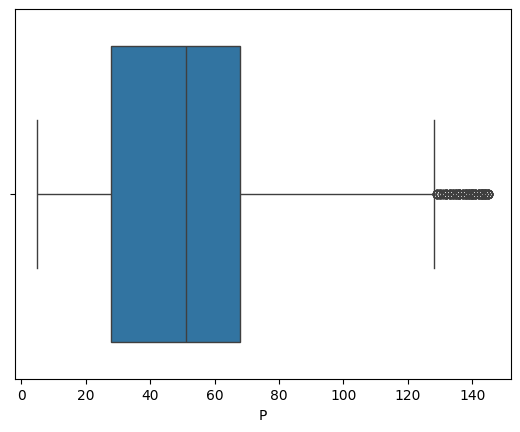

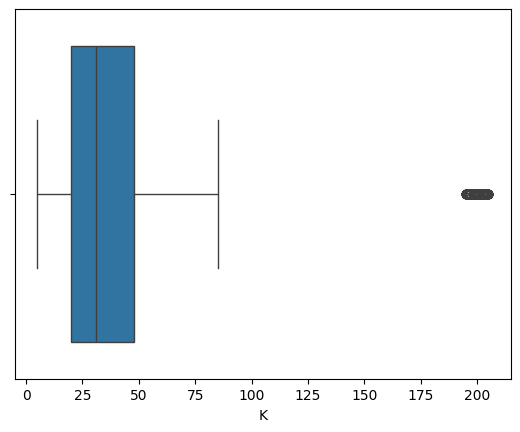

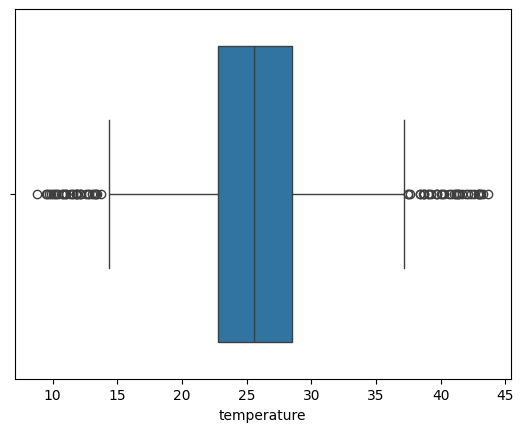

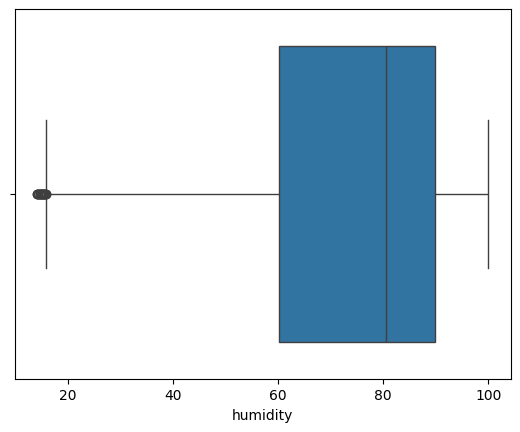

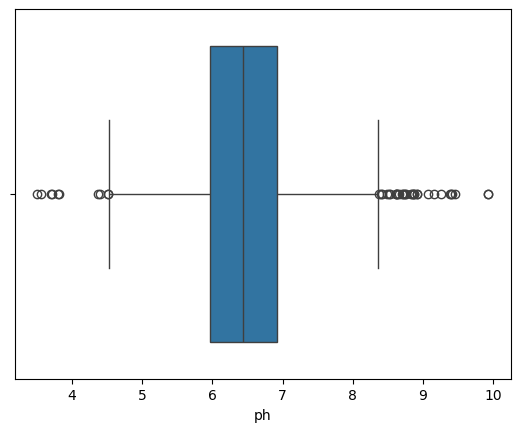

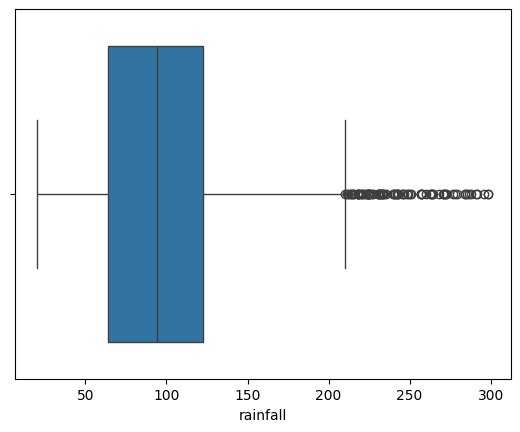

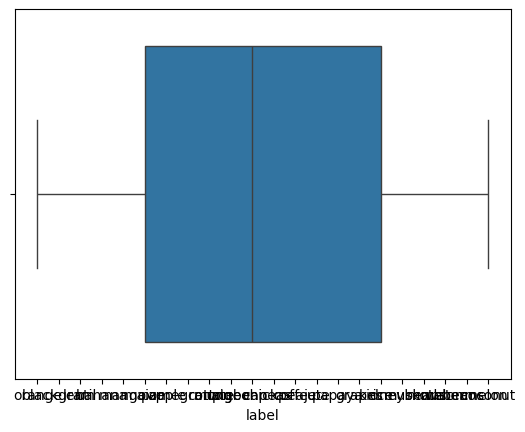

In [12]:
for i in data.columns:
  sns.boxplot(data,x=i)
  plt.show()

<Axes: >

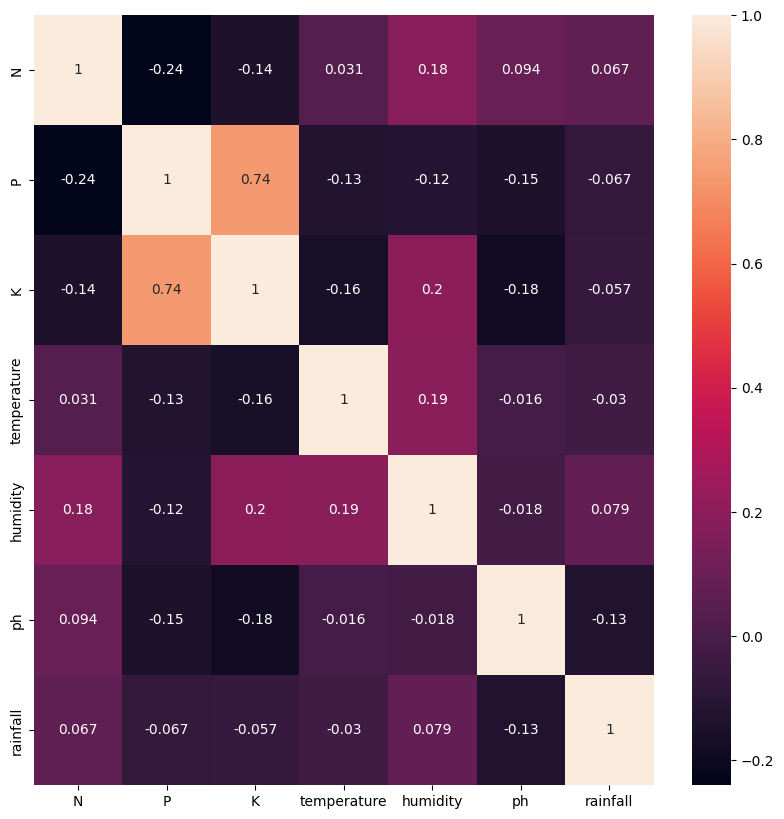

In [13]:
plt.figure(figsize=(10,10))
h=sns.heatmap(data.select_dtypes(include='number').corr(),annot=True)
h

In [14]:
test=pd.read_csv('/content/e-artifact/test.csv')

In [15]:
test.drop(['id'],axis=1,inplace=True)

In [16]:
x=data.drop('label',axis=1)
x

,N,P,K,temperature,humidity,ph,rainfall
0,17,16,14,16.396243,92.181519,6.625539,102.944161
1,37,79,19,27.543848,69.347863,7.143943,69.408782
2,7,73,25,27.521856,63.132153,7.288057,45.208411
3,101,70,48,25.360592,75.031933,6.012697,116.553145
4,0,17,30,35.474783,47.972305,6.279134,97.790725
...,...,...,...,...,...,...,...
1755,10,5,5,21.213070,91.353492,7.817846,112.983436
1756,108,94,47,27.359116,84.546250,6.387431,90.812505
1757,11,36,31,27.920633,51.779659,6.475449,100.258567
1758,11,124,204,13.429886,80.066340,6.361141,71.400430


In [17]:
y=data[['label']]

In [18]:
y

,label
0,orange
1,blackgram
2,lentil
3,banana
4,mango
...,...
1755,orange
1756,banana
1757,mango
1758,grapes


In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
test=scaler.transform(test)

In [20]:
x=pd.DataFrame(x)
test=pd.DataFrame(test)

In [21]:
test

,0,1,2,3,4,5,6
0,1.349349,-1.096058,-0.022254,0.769240,1.052324,-0.376199,-1.389845
1,1.268893,-1.366990,0.056080,0.117852,0.679569,-0.280130,-0.968953
2,0.222961,0.258599,0.016913,3.494241,0.989743,0.602097,0.220561
3,-0.179320,0.198392,0.134413,1.709858,0.862741,0.451914,-0.075010
4,-0.554783,2.516362,2.974009,-0.523784,0.869515,-1.128425,0.290212
...,...,...,...,...,...,...,...
435,1.295712,0.047875,-0.257255,-0.757731,0.394182,0.033312,3.190989
436,0.437512,-0.253160,-0.198505,-0.560413,0.481915,1.066275,2.880172
437,1.885725,-0.192953,-0.629340,-0.387924,0.351341,1.613114,-0.549058
438,1.751631,-0.042436,-0.570590,-0.518190,0.173120,-0.467411,-0.647677


In [22]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
enc_l=enc.fit_transform(y)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,enc_l,test_size=0.2,random_state=42)

In [42]:
len(y_train)

1408

In [41]:
x_train

,0,1,2,3,4,5,6
199,-0.581601,-0.373574,-0.531423,1.162267,-0.395628,3.095937,-0.693405
700,-0.340233,0.258599,-0.453089,1.408652,-0.171700,1.264878,-0.715071
526,-1.037520,-0.493988,-0.355172,1.084410,-1.096753,-2.495358,-0.225261
1716,1.000706,0.017771,-0.081004,0.030615,0.559670,-0.422295,2.374945
1605,0.920249,-0.975644,0.075663,0.795572,0.842071,-0.518343,-1.437397
...,...,...,...,...,...,...,...
1130,1.429806,0.800462,0.114830,0.296933,0.443963,-0.771858,0.136009
1294,-0.474326,-1.186369,-0.786007,-0.893688,0.972134,1.562909,0.146008
860,2.019819,-0.223057,-0.453089,-0.224258,0.460448,0.364083,-0.762060
1459,-0.903427,0.318806,-0.629340,1.060787,-1.785416,0.887009,1.420836


In [26]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [53]:
from sklearn.metrics import accuracy_score

In [57]:
def model(mo):
  mo.fit(x_train,y_train)
  y_preds=m.predict(x_test)
  print(accuracy_score(y_test,y_preds))

In [58]:
m=RandomForestClassifier()
model(m)

0.9943181818181818


In [59]:
m=AdaBoostClassifier()
model(m)

0.16193181818181818


In [60]:
m=GradientBoostingClassifier()
model(m)

0.9857954545454546


In [61]:
m=DecisionTreeClassifier()
model(m)

0.9829545454545454


In [62]:
m=LogisticRegression()
model(m)

0.9630681818181818


In [63]:
m=SVC()
model(m)

0.9829545454545454


In [64]:
m=KNeighborsClassifier()
model(m)

0.96875


In [65]:
final_model=RandomForestClassifier()
final_model.fit(x,enc_l)

RandomForestClassifier()

In [66]:
pred=final_model.predict(test)

In [67]:
pred

array([15, 21, 17, 17,  0, 12,  0, 13, 14, 10,  2,  4, 19,  8,  4, 19,  0,
       11, 17, 15,  5, 17, 16, 17,  3,  8, 14, 16, 18, 20, 19, 13,  8, 10,
        8,  2,  8,  3,  3,  9, 17, 12,  2, 11, 14, 11, 18,  4, 15, 11,  2,
        5,  7, 14,  5,  9,  6,  0,  1,  2, 21,  4, 10, 16, 17, 18, 16, 20,
       15, 18, 15,  4,  8,  1,  2, 17,  1,  6, 21, 16,  5,  3, 20, 13, 16,
       12,  5, 13,  2, 19, 11, 13,  6, 17, 18, 13,  9,  5,  2, 10,  4, 20,
       16, 15, 21,  9, 21,  1, 18, 13,  1,  8,  6, 19, 18,  3, 11,  4, 19,
       20, 18,  7,  2,  4,  3,  2,  4, 11,  1, 13,  1,  9, 19,  3,  4, 16,
       18,  1,  1,  0,  9, 15, 14, 13,  4, 11,  0,  4,  9, 13, 14, 10, 21,
       14, 18, 18, 18,  9, 11,  8,  3,  0, 16,  6, 20,  4,  7, 10, 21,  7,
        7,  2, 19,  3,  4, 11, 10,  7, 21,  8,  5,  5,  9,  8, 13,  9,  1,
        9,  4, 17, 17, 14, 12, 19, 21,  9, 11,  0,  2,  3,  7,  7,  1,  6,
       20, 19, 14,  1,  8, 14, 11,  3,  3,  3,  0, 20,  9, 17,  5,  2,  9,
       12, 12,  4, 17,  0

In [68]:
sub=pd.read_csv('/content/e-artifact/submission.csv')

In [69]:
sub

,id,label
0,1761,0
1,1762,0
2,1763,0
3,1764,0
4,1765,0
...,...,...
435,2196,0
436,2197,0
437,2198,0
438,2199,0


In [70]:
sub['label']=pred

In [72]:
sub.to_csv('submission.df',index=False)